## Parsing A thaliana GO_terms

First, a meta-data base on sample information is build.

Second, a meta-data base on gene information retrieved from bulk GO annotations from TAIR are build.

### FIRST: meta-data base of sample information is build. 

In [98]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data/")
    #print("Current Directory:", os.getcwd())
except OSError:
    print("Can't change the Current Working Directory")    

In [99]:
def make_pie_donut_chart(q, lbs, title):
    fig1, ax1 = plt.subplots(figsize=(15,10))
    # Labels with percentual and float values
    ax1.pie(q, labels=lbs,autopct=make_autopct2(q), 
             textprops={'fontsize': 14}, startangle=90)              
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.text(0, -.1, title, ha='center', fontsize=24)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

In [100]:
def make_autopct2(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

### SECOND: meta-data base on gene information retrieved from bulk GO annotations from TAIR are build.

This meta-data file is for attaching to a Plot Dendogram in wgcna.
<br>
Meta data were retrieved from TAIR DB based from the bulk data retrieval tools. Gene Ontology annotations filtered  by "Functional Categorization" were consulted and here results are treated to use it as meta-data in our analysis. 

In [101]:
# This is the file get from TAIR (https://www.arabidopsis.org/tools/bulk/go/index.jsp)
df = pd.read_csv("athal_GO_terms.txt",  sep='\t', usecols=[0,3,4,5,6,7]) 

In [102]:
# Select the fields of interest and rename columns for a fashion use 
df.columns = ['locus','GO_term','GO_id','TAIR_id','category','GO_slim']
print(df.shape)
df.columns

(201479, 6)


Index(['locus', 'GO_term', 'GO_id', 'TAIR_id', 'category', 'GO_slim'], dtype='object')

In [103]:
df

,locus,GO_term,GO_id,TAIR_id,category,GO_slim
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus
1,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | nucleobase-containi...
2,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity
3,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | other metabolic pro...
4,AT1G01020,mitochondrion,GO:0005739,486.0,comp,mitochondrion
...,...,...,...,...,...,...
201474,ATMG01400,mitochondrion,GO:0005739,486.0,comp,mitochondrion
201475,ATMG01400,biological_process_unknown,GO:0008150,5239.0,proc,unknown biological processes
201476,ATMG01410,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions
201477,ATMG01410,biological_process_unknown,GO:0008150,5239.0,proc,unknown biological processes


In [104]:
# chek uniques by category
df.category.unique()

array(['comp', 'proc', 'func', nan], dtype=object)

In [105]:
## Filter df by molecular function (proceses and component are removed, just keep funciton category)
is_gene_func = (df['category']=='func')     
df_meta = df[is_gene_func]

In [106]:
# chk size and see for duplicated functions 
df_meta.shape

(53878, 6)

In [107]:
df_meta

,locus,GO_term,GO_id,TAIR_id,category,GO_slim
2,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity
6,AT1G01020,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions
22,AT1G01030,protein binding,GO:0005515,3877.0,func,protein binding
27,AT1G01030,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity
32,AT1G01040,protein binding,GO:0005515,3877.0,func,protein binding
...,...,...,...,...,...,...
201461,ATMG01360,heme binding,GO:0020037,9668.0,func,other binding
201469,ATMG01360,cytochrome-c oxidase activity,GO:0004129,2070.0,func,transporter activity | catalytic activity
201471,ATMG01370,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions
201473,ATMG01400,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions


In [108]:
# exploring possible filters 
print(len(df_meta.GO_term.unique()))
df_meta.GO_term.unique()

2747


array(['DNA-binding transcription factor activity',
       'molecular_function_unknown', 'protein binding', ...,
       'proton channel activity', 'phosphate ion binding',
       'oxidoreduction-driven active transmembrane transporter activity'],
      dtype=object)

In [109]:
# # chk how many locus extists in the df
# lst_unique_locus = df_meta.locus.unique()
# print(len(lst_unique_locus))
# lst_unique_locus

# arbitrary remove duplicates and just keep the first locus ocurrence to have a reduced df to attach to the wgcna dendogram
df_unique = df_meta.drop_duplicates(subset = ["locus"])
# gene variants may be lost, need to find a better way to filter  ....

In [110]:
print(len(df_unique))
#df_unique.rename(columns={'locus': 'Genes'}, inplace=True)
df_gene_func = df_unique.rename({'locus':'Genes'}, axis='columns')

22340


In [111]:
df_gene_func.to_csv('gene_meta_data_category_func.csv', header=True, sep='\t', index=False)

### Load expression matrix to merge the gene functions asociated
### Arabidopsis infected dataset

In [112]:
#df_gene_func = pd.read_csv("gene_meta_data_category_func.csv",  sep='\t') 
df_infected_MatE = pd.read_csv("../results-data/matrices_de_expresion/matrix_E_infected.csv",  sep='\t') 

In [113]:
print(df_gene_func.shape)
print(df_infected_MatE.shape)

(22340, 6)
(20274, 15)


In [114]:
#df_infected_MatE_GOFunc = pd.concat([df_infected_MatE, df_gene_func], axis=1, join='inner')
df_infected_MatE_GOFunc = df_infected_MatE.merge(df_gene_func,on=['Genes'],how='left')
df_infected_MatE_GOFunc.shape

(20274, 20)

### Plot categorical gene function in the raw matrix (infected)

In [115]:
#df_infected_MatE_GOFunc
df_plt_GOSlim = df_infected_MatE_GOFunc[['Genes','GO_slim']]
df_plt_GOSlim

,Genes,GO_slim
0,AT1G01020,unknown molecular functions
1,AT1G01030,protein binding
2,AT1G01040,protein binding
3,AT1G01050,hydrolase activity
4,AT1G01060,nucleic acid binding | DNA binding
...,...,...
20269,ATMG01350,unknown molecular functions
20270,ATMG01360,transporter activity | catalytic activity
20271,ATMG01370,unknown molecular functions
20272,ATMG01400,unknown molecular functions


In [116]:
df_tmp = df_plt_GOSlim.groupby(['GO_slim']).count()
print(len(df_tmp))
df_tmp.tail(8)

101


,Genes
GO_slim,
transferase activity | translation regulator activity | catalytic activity | kinase activity,1
"translation factor activity, RNA binding",39
translation regulator activity,2
translation regulator activity | nucleic acid binding,3
transporter activity,886
transporter activity | catalytic activity,8
transporter activity | transporter activity,2
unknown molecular functions,3687


In [117]:
df_tmp.reset_index(level='GO_slim', col_level=1, inplace=True)
df_tmp

,GO_slim,Genes
0,DNA binding,330
1,DNA binding | DNA binding,1
2,DNA binding | chromatin binding,1
3,DNA binding | chromatin binding | other binding,1
4,DNA binding | hydrolase activity,3
...,...,...
96,translation regulator activity | nucleic acid ...,3
97,transporter activity,886
98,transporter activity | catalytic activity,8
99,transporter activity | transporter activity,2


In [118]:
df_tmp.describe()

,Genes
count,101.000000
mean,165.811881
std,500.535847
min,1.000000
25%,2.000000
50%,8.000000
75%,69.000000
max,3687.000000


In [120]:
#df_tmp.sort_values(['Genes'])
## Filter df by molecular function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes']>=69    
df_tmp_infected = df_tmp[is_gene_grater1]
df_tmp_infected

,GO_slim,Genes
0,DNA binding,330
7,DNA-binding transcription factor activity,641
8,RNA binding,847
12,catalytic activity,1280
14,catalytic activity | hydrolase activity,281
20,catalytic activity | transferase activity,234
21,catalytic activity | transferase activity | ki...,76
29,enzyme regulator activity,169
32,hydrolase activity,996
34,hydrolase activity | catalytic activity,305


In [23]:
data = df_tmp_infected['Genes'].to_list()
goslim = df_tmp_infected['GO_slim'].tolist()

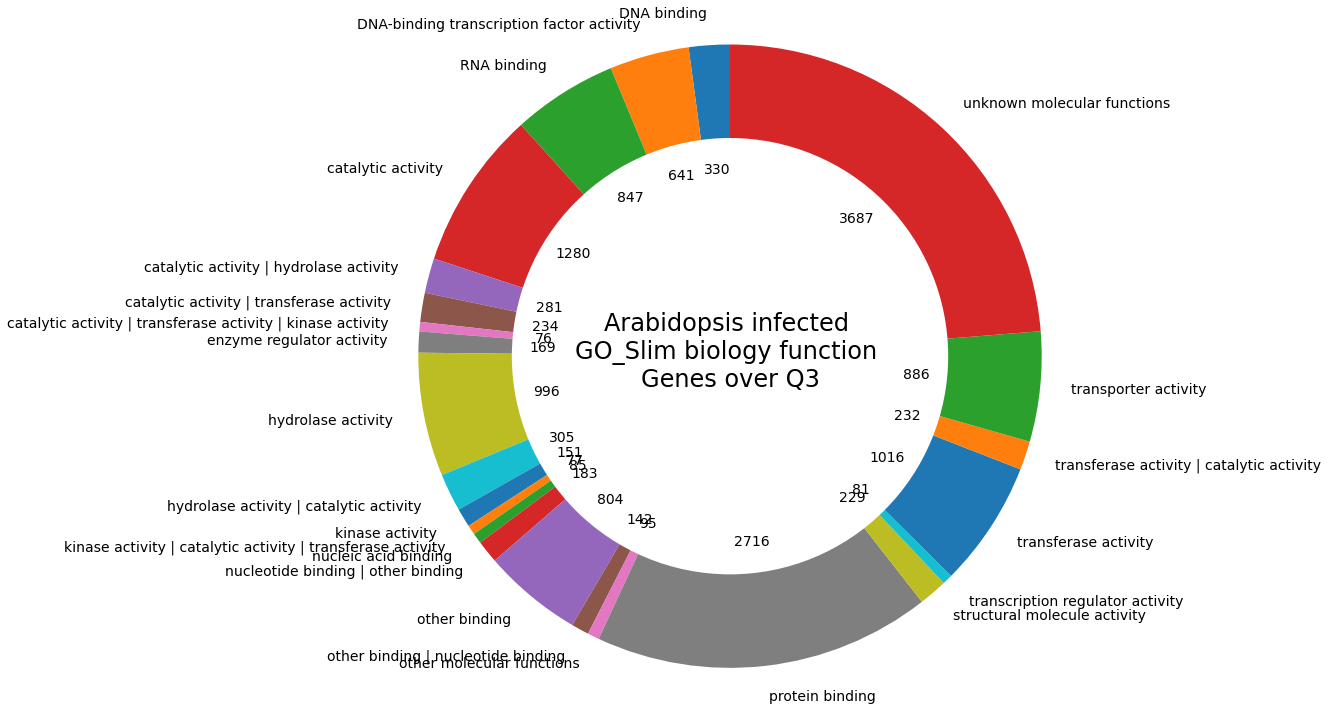

In [34]:
make_pie_donut_chart(data, goslim, "Arabidopsis infected \nGO_Slim biology function \nGenes over Q3")

### Load expression matrix to merge the gene functions asociated
### Arabidopsis healthy dataset

In [121]:
#df_gene_func = pd.read_csv("gene_meta_data_category_func.csv",  sep='\t') 
df_healthy_MatD = pd.read_csv("../results-data/matrices_de_expresion/matrix_D_healthy.csv",  sep='\t') 

In [122]:
print(df_gene_func.shape)
print(df_healthy_MatD.shape)

(22340, 6)
(19792, 9)


In [123]:
df_healthy_MatD_GOFunc = df_healthy_MatD.merge(df_gene_func,on=['Genes'],how='left')
df_healthy_MatD_GOFunc.shape

(19792, 14)

### Plot categorical gene function in the raw matrix (infected)

In [124]:
#df_infected_MatE_GOFunc
df_plt_GOSlim = df_healthy_MatD_GOFunc[['Genes','GO_slim']]
df_plt_GOSlim

,Genes,GO_slim
0,AT1G01020,unknown molecular functions
1,AT1G01030,protein binding
2,AT1G01040,protein binding
3,AT1G01050,hydrolase activity
4,AT1G01070,transporter activity
...,...,...
19787,ATMG01330,unknown molecular functions
19788,ATMG01350,unknown molecular functions
19789,ATMG01360,transporter activity | catalytic activity
19790,ATMG01370,unknown molecular functions


In [125]:
df_tmp = df_plt_GOSlim.groupby(['GO_slim']).count()
print(len(df_tmp))
df_tmp.tail(8)

102


,Genes
GO_slim,
transferase activity | translation regulator activity | catalytic activity | kinase activity,1
"translation factor activity, RNA binding",40
translation regulator activity,2
translation regulator activity | nucleic acid binding,3
transporter activity,862
transporter activity | catalytic activity,8
transporter activity | transporter activity,2
unknown molecular functions,3579


In [126]:
df_tmp.reset_index(level='GO_slim', col_level=1, inplace=True)
df_tmp

,GO_slim,Genes
0,DNA binding,326
1,DNA binding | DNA binding,1
2,DNA binding | chromatin binding,1
3,DNA binding | chromatin binding | other binding,1
4,DNA binding | hydrolase activity,3
...,...,...
97,translation regulator activity | nucleic acid ...,3
98,transporter activity,862
99,transporter activity | catalytic activity,8
100,transporter activity | transporter activity,2


In [127]:
df_tmp.describe()

,Genes
count,102.000000
mean,160.480392
std,486.211618
min,1.000000
25%,2.000000
50%,6.000000
75%,64.000000
max,3579.000000


In [128]:
#df_tmp.sort_values(['Genes'])
## Filter df by molecular function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes']>=64    
df_tmp_healthy = df_tmp[is_gene_grater1]
df_tmp_healthy

,GO_slim,Genes
0,DNA binding,326
5,DNA binding | nucleic acid binding,64
7,DNA-binding transcription factor activity,618
8,RNA binding,827
12,catalytic activity,1256
14,catalytic activity | hydrolase activity,272
20,catalytic activity | transferase activity,235
21,catalytic activity | transferase activity | ki...,73
29,enzyme regulator activity,171
32,hydrolase activity,960


In [49]:
data2 = df_tmp_healthy['Genes'].to_list()
goslim2 = df_tmp_healthy['GO_slim'].tolist()

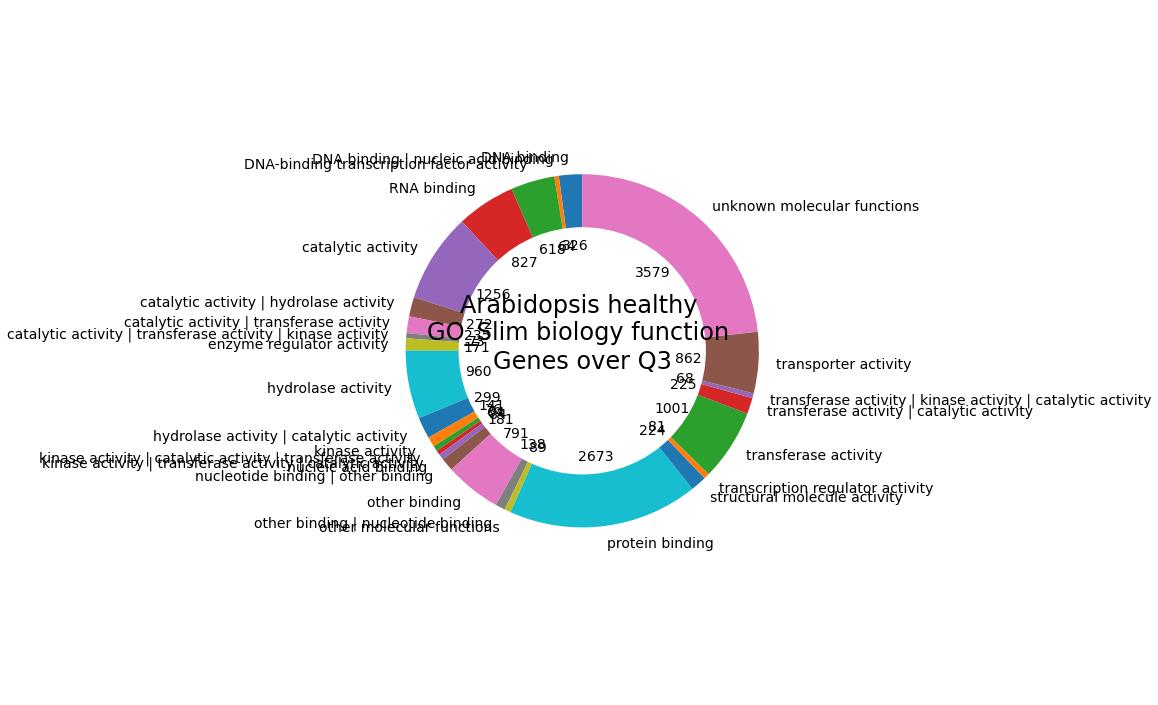

In [50]:
make_pie_donut_chart(data2, goslim2, "Arabidopsis healthy \nGO_Slim biology function \nGenes over Q3")

### Integrate results to plot as comparison

In [129]:
df_infected = df_tmp_infected.rename({'Genes':'Genes_Inf'}, axis='columns')
df_healthy = df_tmp_healthy.rename({'Genes':'Genes_Healthy'}, axis='columns')
df_infected

,GO_slim,Genes_Inf
0,DNA binding,330
7,DNA-binding transcription factor activity,641
8,RNA binding,847
12,catalytic activity,1280
14,catalytic activity | hydrolase activity,281
20,catalytic activity | transferase activity,234
21,catalytic activity | transferase activity | ki...,76
29,enzyme regulator activity,169
32,hydrolase activity,996
34,hydrolase activity | catalytic activity,305


In [130]:
df_plt_comp = df_infected.merge(df_healthy,on=['GO_slim'],how='outer')
df_plt_comp.shape

(28, 3)

In [131]:
print(len(df_plt_comp))
df_plt_comp

28


,GO_slim,Genes_Inf,Genes_Healthy
0,DNA binding,330.0,326.0
1,DNA-binding transcription factor activity,641.0,618.0
2,RNA binding,847.0,827.0
3,catalytic activity,1280.0,1256.0
4,catalytic activity | hydrolase activity,281.0,272.0
5,catalytic activity | transferase activity,234.0,235.0
6,catalytic activity | transferase activity | ki...,76.0,73.0
7,enzyme regulator activity,169.0,171.0
8,hydrolase activity,996.0,960.0
9,hydrolase activity | catalytic activity,305.0,299.0


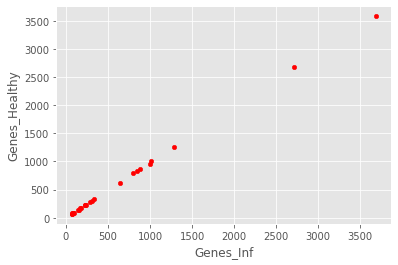

In [132]:
# a scatter plot comparing num_children and num_pets
df_plt_comp.plot(kind='scatter',x='Genes_Inf',y='Genes_Healthy',color='red')
plt.show()

In [165]:
df_plt_comp.fillna(0)
df_plt_comp.sort_values(['Genes_Healthy'])
df_plt_comp



,GO_slim,Genes_Inf,Genes_Healthy
0,DNA binding,330.0,326.0
1,DNA-binding transcription factor activity,641.0,618.0
2,RNA binding,847.0,827.0
3,catalytic activity,1280.0,1256.0
4,catalytic activity | hydrolase activity,281.0,272.0
5,catalytic activity | transferase activity,234.0,235.0
6,catalytic activity | transferase activity | ki...,76.0,73.0
7,enzyme regulator activity,169.0,171.0
8,hydrolase activity,996.0,960.0
9,hydrolase activity | catalytic activity,305.0,299.0


In [ ]:
df_plt_comp.iloc[[13,26,27]]
## Calcular el fold-change o la diferencia

In [134]:
labels = df_plt_comp['GO_slim'].tolist()
labels
#Name_list = df["Name"].tolist()

['DNA binding',
 'DNA-binding transcription factor activity',
 'RNA binding',
 'catalytic activity',
 'catalytic activity | hydrolase activity',
 'catalytic activity | transferase activity',
 'catalytic activity | transferase activity | kinase activity',
 'enzyme regulator activity',
 'hydrolase activity',
 'hydrolase activity | catalytic activity',
 'kinase activity',
 'kinase activity | catalytic activity | transferase activity',
 'nucleic acid binding',
 'nucleic acid binding | DNA binding',
 'nucleotide binding | other binding',
 'other binding',
 'other binding | nucleotide binding',
 'other molecular functions',
 'protein binding',
 'structural molecule activity',
 'transcription regulator activity',
 'transferase activity',
 'transferase activity | catalytic activity',
 'transferase activity | kinase activity | catalytic activity',
 'transporter activity',
 'unknown molecular functions',
 'DNA binding | nucleic acid binding',
 'kinase activity | transferase activity | catalytic 

In [155]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


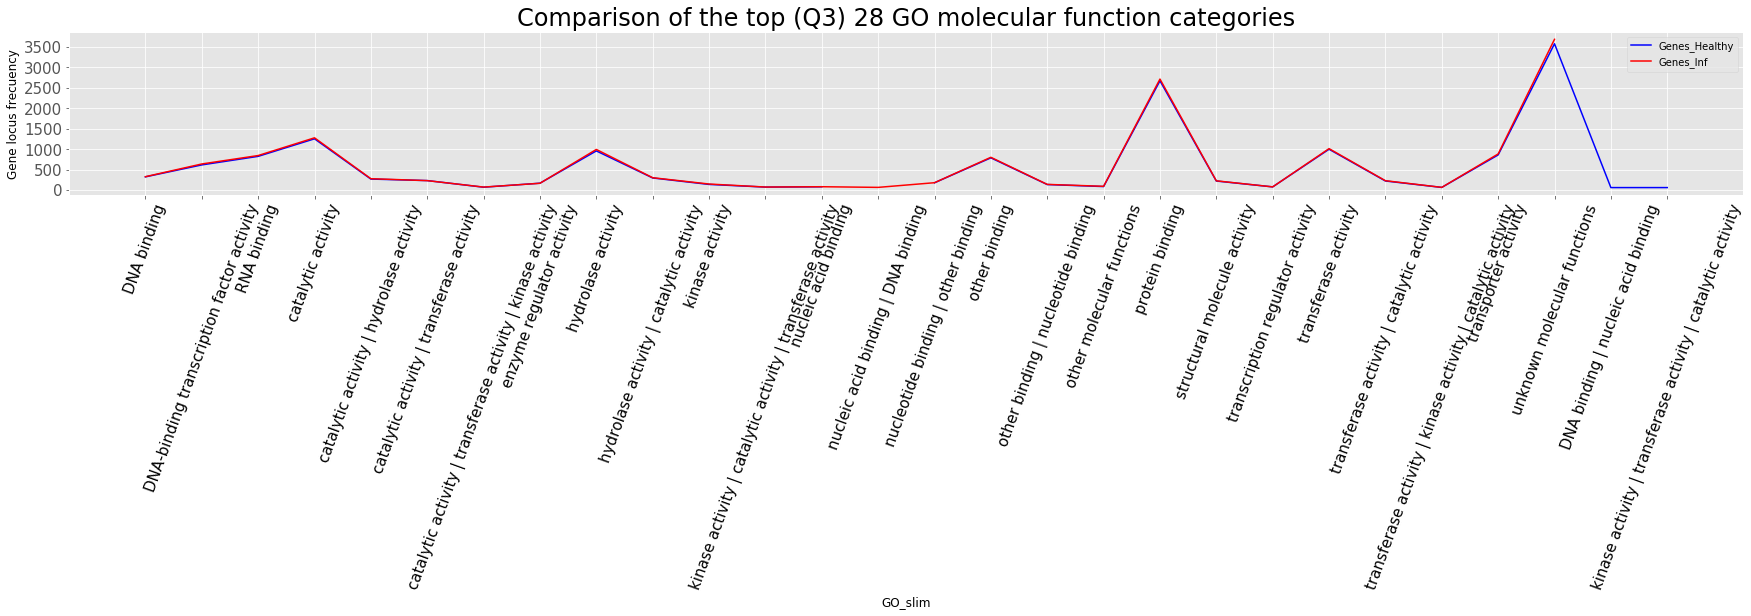

In [156]:
# gca stands for 'get current axis'
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(30,3))
plt.style.use('_classic_test_patch')

ax.set_ylabel('Gene locus frecuency', color='black')
ax.set_xlabel('GO Molecular Function',color='black')
ax.set_title("Comparison of the top (Q3) "+str(len(labels))+" GO molecular function categories", fontsize=24)

ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

df_plt_comp.plot(kind='line',x='GO_slim',y='Genes_Healthy', color='blue', fontsize=15, ax=ax)
df_plt_comp.plot(kind='line',x='GO_slim',y='Genes_Inf', color='red', ax=ax)

plt.xticks(rotation=70, color='black')
plt.show()
